In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [3]:
from pyReef.model import Model 

# Initialise model

In [4]:
# initialise model
reef = Model()

In [5]:
# Define the XmL input file
reef.load_xml('input.xml')

## Visualise bathymetry

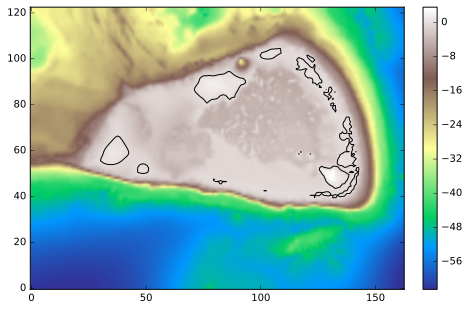

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

# display plots in SVG format
%config InlineBackend.figure_format = 'svg' 

plt.figure(figsize = (7.5,6))
ax = plt.gca()

im = plt.imshow(reef.pyGrid.regZ.T-reef.force.sealevel, origin='lower', cmap='terrain', aspect=1)

levels = [0]

CS = plt.contour(reef.pyGrid.regZ.T-reef.force.sealevel, levels, colors='k', 
                 origin='lower',             # origin in lower-left corner
                 linewidths=1)         # outer pixel boundaries

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1, aspect=20)
cb = plt.colorbar(im, cax=cax)
plt.show()

# Run model

We run the model for a given time period 

In [7]:
# Run model
reef.run_to_time(0.5)

Swan model of waves field 1 and climatic conditions 0:
took 20.50 seconds to run.
Longshore model for wave field 1 and climatic conditions 0:
took 1.12 seconds to run.


## Visualise wave-induced bottom velocities and wave heights

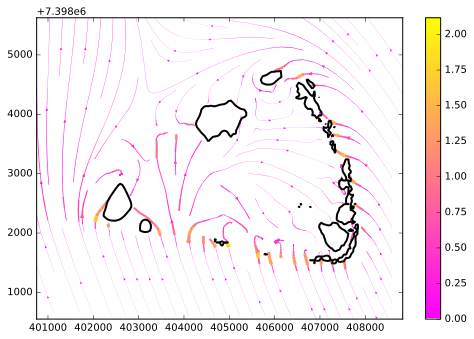

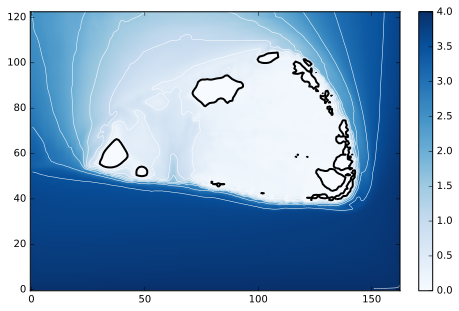

In [11]:
x = reef.pyGrid.regX
y = reef.pyGrid.regY
xm, ym = np.meshgrid(x, y, sparse=False, indexing='ij')
X = xm.T
Y = ym.T
U = reef.force.wavU[0].T
V = reef.force.wavV[0].T


fig0, ax0 = plt.subplots(figsize = (8.2,5.4))

dx = x[1]-x[0]
bYmin = y.min() #6000000
bYmax = y.max()
j1 = 0 #int((bYmin-y[0])/dx)
j2 = len(y)

bXmin = x.min()
bXmax = x.max() #1300000 #(bYmax-bYmin) + bXmin
i1 = 0
i2 = len(x) #max(int((bXmax-x[0])/dx)+1,len(x))

speed = np.sqrt(U[j1:j2,i1:i2]**2+V[j1:j2,i1:i2]**2)
lw = 5*speed / speed.max()

plt.contour(X[j1:j2,i1:i2], Y[j1:j2,i1:i2], reef.pyGrid.regZ.T[j1:j2,i1:i2]-reef.force.sealevel, [0], 
            colors='k', origin='lower', linewidths=2)

strm = ax0.streamplot(X[j1:j2,i1:i2], Y[j1:j2,i1:i2], U[j1:j2,i1:i2], V[j1:j2,i1:i2], 
                      color=speed, density=1., linewidth=lw, cmap=plt.cm.spring, arrowsize=0.5)
fig0.colorbar(strm.lines)

plt.xlim(bXmin,bXmax)
plt.ylim(bYmin+1000, bYmax)
plt.show()

# --------

plt.figure(figsize = (7.5,5))
ax = plt.gca()
im = plt.imshow(reef.hydro.hydroH.T, origin='lower', cmap='Blues', aspect=1)
levels = [0.5,1,1.5,2,2.5,3,3.5,4]
CS = plt.contour(reef.hydro.hydroH.T, levels, colors='w', origin='lower', linewidths=0.5)
levels = [0]
CS = plt.contour(reef.pyGrid.regZ.T-reef.force.sealevel, levels, colors='k', origin='lower', linewidths=2)   
# Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1, aspect=20)
cb = plt.colorbar(im, cax=cax)
plt.show()

# Run next time step

In [12]:
# Run model
reef.run_to_time(1.)

Swan model of waves field 1 and climatic conditions 0:
took 28.64 seconds to run.
Longshore model for wave field 1 and climatic conditions 0:
took 0.98 seconds to run.


## Visualise wave-induced bottom velocities and wave heights

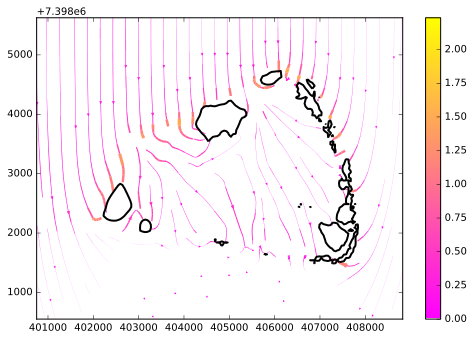

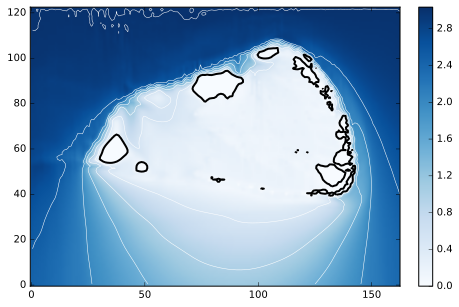

In [13]:
x = reef.pyGrid.regX
y = reef.pyGrid.regY
xm, ym = np.meshgrid(x, y, sparse=False, indexing='ij')
X = xm.T
Y = ym.T
U = reef.force.wavU[0].T
V = reef.force.wavV[0].T


fig0, ax0 = plt.subplots(figsize = (8.2,5.4))

dx = x[1]-x[0]
bYmin = y.min() #6000000
bYmax = y.max()
j1 = 0 #int((bYmin-y[0])/dx)
j2 = len(y)

bXmin = x.min()
bXmax = x.max() #1300000 #(bYmax-bYmin) + bXmin
i1 = 0
i2 = len(x) #max(int((bXmax-x[0])/dx)+1,len(x))

speed = np.sqrt(U[j1:j2,i1:i2]**2+V[j1:j2,i1:i2]**2)
lw = 5*speed / speed.max()

plt.contour(X[j1:j2,i1:i2], Y[j1:j2,i1:i2], reef.pyGrid.regZ.T[j1:j2,i1:i2]-reef.force.sealevel, [0], 
            colors='k', origin='lower', linewidths=2)

strm = ax0.streamplot(X[j1:j2,i1:i2], Y[j1:j2,i1:i2], U[j1:j2,i1:i2], V[j1:j2,i1:i2], 
                      color=speed, density=1., linewidth=lw, cmap=plt.cm.spring, arrowsize=0.5)
fig0.colorbar(strm.lines)

plt.xlim(bXmin,bXmax)
plt.ylim(bYmin+1000, bYmax)
plt.show()

# --------

plt.figure(figsize = (7.5,5))
ax = plt.gca()
im = plt.imshow(reef.hydro.hydroH.T, origin='lower', cmap='Blues', aspect=1)
levels = [0.5,1,1.5,2,2.5,3,3.5,4]
CS = plt.contour(reef.hydro.hydroH.T, levels, colors='w', origin='lower', linewidths=0.5)
levels = [0]
CS = plt.contour(reef.pyGrid.regZ.T-reef.force.sealevel, levels, colors='k', origin='lower', linewidths=2)   
# Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1, aspect=20)
cb = plt.colorbar(im, cax=cax)
plt.show()

# Compute slopes

In [ ]:
def assignBCs(elevGrid):
    # Pads the boundaries of a grid
    # Boundary condition pads the boundaries with equivalent values 
    # to the data margins, e.g. x[-1,1] = x[1,1]
    # This creates a grid 2 rows and 2 columns larger than the input

    ny, nx = elevGrid.shape  # Size of array
    Zbc = np.zeros((ny + 2, nx + 2))  # Create boundary condition array
    Zbc[1:-1,1:-1] = elevGrid  # Insert old grid in center

    #Assign boundary conditions - sides
    Zbc[0, 1:-1] = elevGrid[0, :]
    Zbc[-1, 1:-1] = elevGrid[-1, :]
    Zbc[1:-1, 0] = elevGrid[:, 0]
    Zbc[1:-1, -1] = elevGrid[:,-1]

    #Assign boundary conditions - corners
    Zbc[0, 0] = elevGrid[0, 0]
    Zbc[0, -1] = elevGrid[0, -1]
    Zbc[-1, 0] = elevGrid[-1, 0]
    Zbc[-1, -1] = elevGrid[-1, 0]

    return Zbc

def calcFiniteSlopes(elevGrid, dx):
    # sx,sy = calcFiniteDiffs(elevGrid,dx)
    # calculates finite differences in X and Y direction using the 
    # 2nd order/centered difference method.
    # Applies a boundary condition such that the size and location 
    # of the grids in is the same as that out.

    # Assign boundary conditions
    Zbc = assignBCs(elevGrid)

    #Compute finite differences
    Sx = (Zbc[1:-1, 2:] - Zbc[1:-1, :-2])/(2*dx)
    Sy = (Zbc[2:,1:-1] - Zbc[:-2, 1:-1])/(2*dx)

    return Sx, Sy

In [ ]:
import numpy as np

# Create arrays of the x and y coordinates of each pixel (the axes)
x = reef.pyGrid.regX
y = reef.pyGrid.regY
z = reef.pyGrid.regZ - reef.force.sealevel
dx = reef.pyGrid.res

# Data range
dataExtent = [np.amin(x), np.amax(x),
              np.amax(y), np.amin(y)]

# Create 2 2d grids describing x and y coordinates
#X,Y = np.meshgrid(x, y, sparse=False, indexing='ij')

# Calculate slope
Sy,Sx = calcFiniteSlopes(z,dx)
Smag = np.sqrt(Sx**2 + Sy**2)
print Smag.shape
print Smag[1,1],Smag[-1,-1]
plt.imshow(Smag.T, interpolation = 'bilinear',
        cmap='coolwarm', vmin=0, vmax=0.1, extent=dataExtent)

plt.gca().invert_yaxis()
plt.show()

# Compute open-water estimation

In [ ]:
import math
import numpy as np
from scipy import signal

hscale = 1500. 
sigr = 30

x = reef.pyGrid.regX
y = reef.pyGrid.regY
z = reef.pyGrid.regZ -reef.force.sealevel
xmin = min(reef.pyGrid.regX)
xmax = max(reef.pyGrid.regX)
ymin = min(reef.pyGrid.regY)
ymax = max(reef.pyGrid.regY)
nx = len(reef.pyGrid.regX)
ny = len(reef.pyGrid.regY)
xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')

xm = xv.T - ((xmax-xmin)/2 + xmin)
ym = yv.T - ((ymax-ymin)/2 + ymin)

In [ ]:
r = np.sqrt(xm**2 + ym**2)
Gfac = 3./(math.pi*hscale**3)
G = Gfac * np.exp(1-r/hscale)

In [ ]:
#zconv = signal.convolve2d(-z.T, G, boundary='symm', mode='same')
zconv = signal.fftconvolve(-z.T, G, mode='same')
zs = zconv.T 

In [ ]:
zs[zs < 0.] = 0.
U = 1.-np.exp(-zs/sigr)
umax = np.amax(U)
U = U/umax

In [ ]:
plt.figure()

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt

# display plots in SVG format
%config InlineBackend.figure_format = 'svg' 

plt.figure(figsize = (5,5))
ax = plt.gca()

im = plt.imshow(U.T, origin='lower', cmap='terrain', aspect=1)

levels = [0,0.05,0.1,0.2,0.3,0.4,0.5]

CS = plt.contour(z.T, levels, colors='r', 
                 origin='lower',             # origin in lower-left corner
                 linewidths=1.5)         # outer pixel boundaries

CS = plt.contour(U.T, levels, colors='w', 
                 origin='lower',             # origin in lower-left corner
                 linewidths=1.5)         # outer pixel boundaries

# Colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="10%", pad=0.1, aspect=20)
cb = plt.colorbar(im, cax=cax)
plt.clabel(CS, fontsize=9, inline=1)

plt.show()

# Run in parallel

In [ ]:
!mpiexec -n 1 python mpi_example.py 1.

In [1]:
!mpiexec -n 2 python mpi_example.py 1.

loading input.xml
loading input.xml
+ waves circulation completion:      1.264 %
+ waves circulation completion:     74.249 %
+ waves circulation completion:     96.021 %
+ waves circulation completion:     99.238 %
Swan model of waves field 1 and climatic conditions 0:
took 10.07 seconds to run.
Longshore model for wave field 1 and climatic conditions 0:
took 0.94 seconds to run.
+ waves circulation completion:      9.860 %
+ waves circulation completion:     62.295 %
+ waves circulation completion:     85.689 %
+ waves circulation completion:     93.927 %
+ waves circulation completion:     97.627 %
+ waves circulation completion:     99.218 %
Swan model of waves field 1 and climatic conditions 0:
took 15.20 seconds to run.
Longshore model for wave field 1 and climatic conditions 0:
took 1.04 seconds to run.
None
None
run to 1.0 years finished in 27.8101317883 seconds
run to 1.0 years finished in 27.8473968506 seconds


In [ ]:
!mpiexec -n 3 python mpi_example.py 1.